In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Import the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

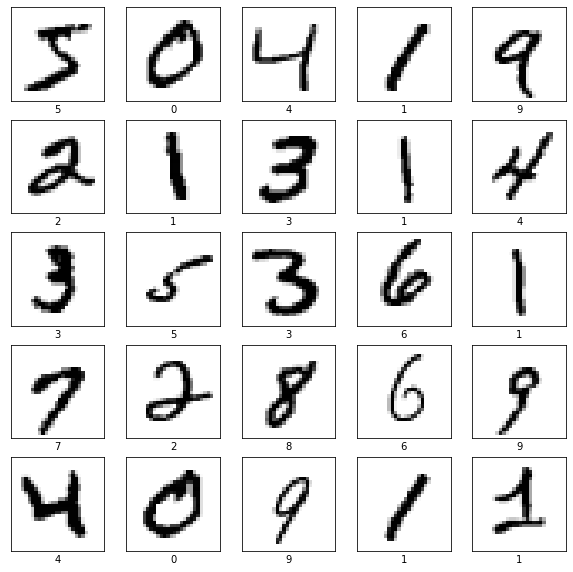

In [ ]:
# Verify the data
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# Create the model using Keras API
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Add a vanilla layer
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax', name="output")(x)

# Finalize the new model
model = tf.keras.Model(inputs, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928 

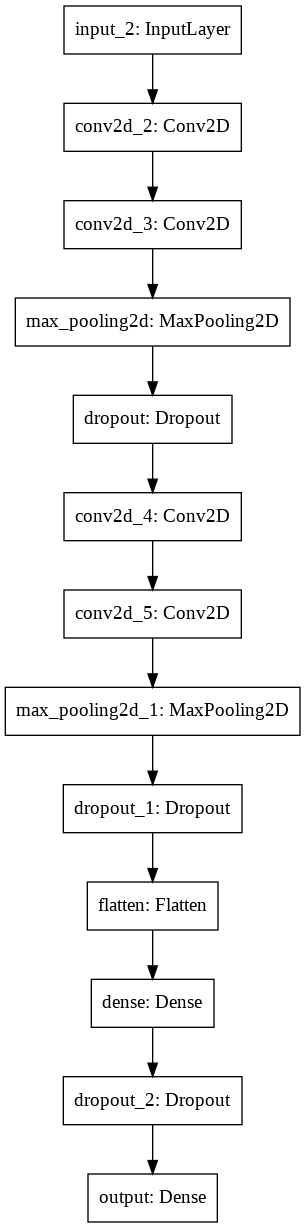

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# Compile and train model
model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=2,
                    validation_data=(test_images, test_labels))

Epoch 1/2
1875/1875 [==============================] - 188s 100ms/step - loss: 0.3411 - accuracy: 0.8873 - val_loss: 0.0431 - val_accuracy: 0.9866
Epoch 2/2
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 0.0331 - val_accuracy: 0.9889


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 6s - loss: 0.0331 - accuracy: 0.9889
0.9889000058174133
